In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("home-data-for-ml-course\\train.csv")
test = pd.read_csv("home-data-for-ml-course\\test.csv")
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

In [173]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [174]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [175]:
#train_nominal = train.select_dtypes(include=['object'])
#train_numerical = train.select_dtypes(include=['int64','float64'])


In [176]:
train.shape

(1460, 81)

In [177]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [178]:
poolhouse=train[train["PoolArea"] > 0]
#print(train.columns)
poolhouse.head(7)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174,25419,Pave,NA,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NA,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78,10140,Pave,NA,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NA,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76,9880,Pave,NA,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NA,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160,15623,Pave,NA,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NA,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313,63887,Pave,NA,IR3,Bnk,AllPub,...,480,Gd,NA,NA,0,1,2008,New,Partial,160000
1386,1387,60,RL,80,16692,Pave,NA,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NA,19690,Pave,NA,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NA,0,8,2006,WD,Alloca,274970


In [179]:
poolhouse.shape

(7, 81)

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [181]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [182]:
#save the id
train_ID = train["Id"]
test_ID = test["Id"]
#drop ID duuuh..
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train_nominal = train.select_dtypes(include=['object'])
train_numerical = train.select_dtypes(include=['int64','float64'])
#We got the categories from the description of the dataset info offered to us.
#Group features for preprocessing purpose.
categorical_features = [feature for feature in train.columns if train[feature].dtype == "object"] 

#from data set description
nominal_features = ["MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", 
                    "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
                    "CentralAir", 'Electrical',"GarageType", "MiscFeature", "SaleType", "SaleCondition"]

ordinal_features = [ 'LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
                    'GarageCond','PavedDrive','PoolQC','Fence']



numerical_features = [feature for feature in train.columns if feature not in categorical_features + ['SalePrice']]

discrete_numerical_features = [ 'OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold', "MSSubClass"] 

continuous_numerical_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                                 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt',
                                 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                                 'MiscVal','YrSold']

#Just checking if any little feature left behind
assert categorical_features.sort() == (nominal_features + ordinal_features).sort()
assert numerical_features.sort() == (discrete_numerical_features + continuous_numerical_features).sort()


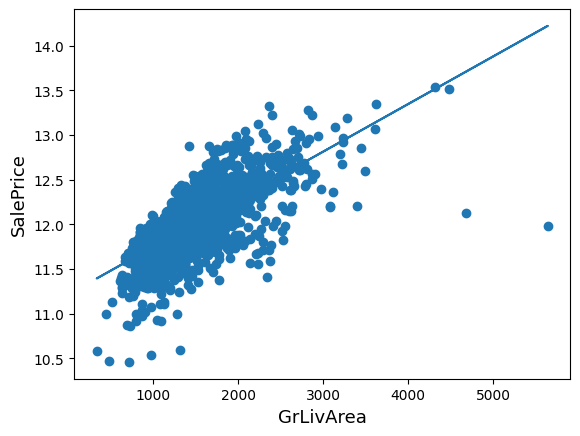

In [183]:
#fig as in figure, ax is the plot...
fig, ax = plt.subplots()
#ax.scatter, draw ax as a scatter plot
ax.scatter(x = train['GrLivArea'], y = np.log(train['SalePrice']))
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
#draw the regression line, m(GrLiveArea)+b
m, b = np.polyfit(train['GrLivArea'], np.log(train['SalePrice']), 1)
#m = slope, b=intercept
plt.plot(train['GrLivArea'], m*train['GrLivArea'] + b)

plt.show()

In [184]:
#train.shape[1]
#a = int(np.sqrt(train.shape[1]))
#a = 4
#b = int(train.shape[1]/4)
#r = int(train.shape[1]/a)
#c = int(train.shape[1]/b)
#i = 0
#fig, ax = plt.subplots(nrows=r, ncols=c, figsize=(15, 60))
#for row in ax:
 #   for col in row:
 #       try:
 #           col.scatter(x = train[train.columns[i]], y = np.log(train['SalePrice']))
 #           col.title.set_text(train.columns[i])
 #       except:
 #           temp=1
        #except Exception as e:
        #    print(e.message, e.args)
 #       finally:
  #          temp=1
   #     i = i + 1
        
#plt.show()

In [185]:
#train = train.drop(train[(train['OverallQual']>9) & (train['SalePrice']<220000)].index)
#train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#train = train.drop(train[(train['LotFrontage']>300) & (train['SalePrice']<400000)].index)
#train = train.drop(train[(train['LotArea']>100000) & (train['SalePrice']<400000)].index)
train = train.drop(train[(train['BsmtFinSF1']>4000) & (train['SalePrice']<250000)].index)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<250000)].index)

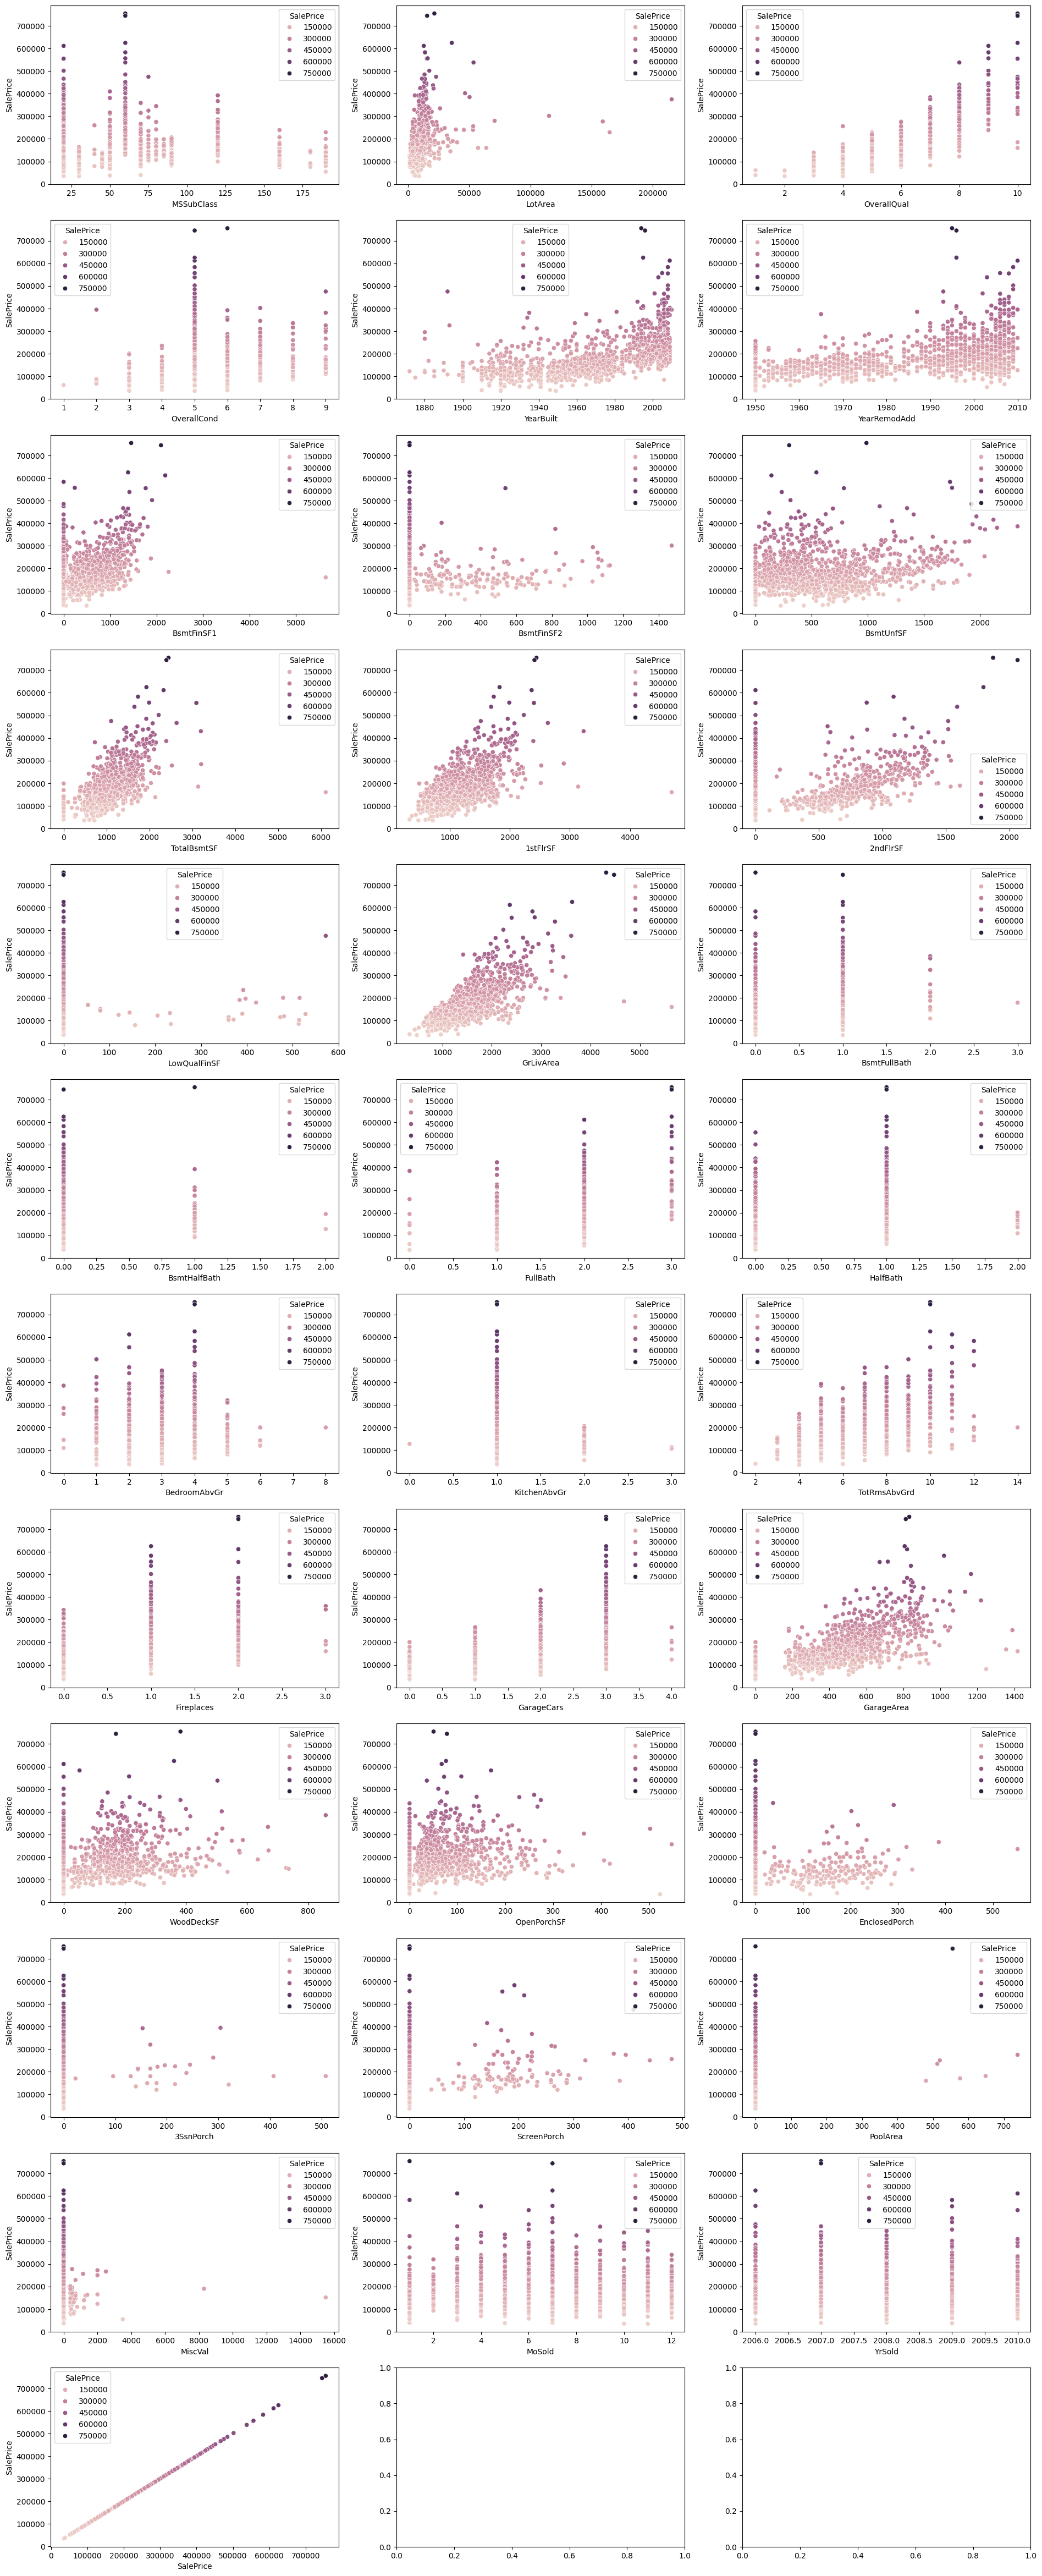

In [186]:
fig, ax = plt.subplots(12, 3, figsize=(23, 60))
for var, subplot in zip(train_numerical, ax.flatten()):
    sns.scatterplot(x=var, y='SalePrice',  data=train_numerical, ax=subplot, hue = 'SalePrice' )

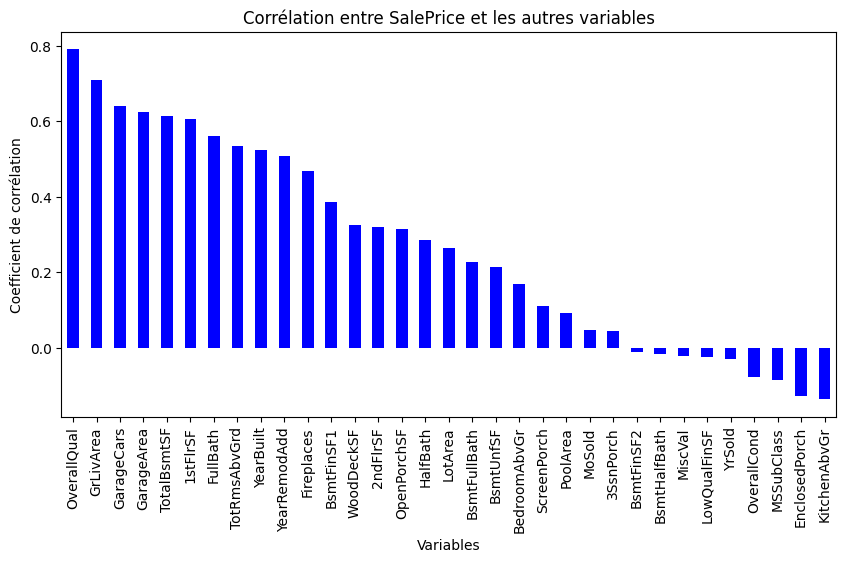

In [187]:
#train_numerical.corr()
coorprice = train_numerical.corr()['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
coorprice[1:].plot(kind='bar', color='b')  # Exclut SalePrice (qui a une corrélation de 1 avec lui-même)
plt.title("Corrélation entre SalePrice et les autres variables")
plt.ylabel("Coefficient de corrélation")
plt.xlabel("Variables")
plt.show()